### Parteiprogramme zur BTW 2025

In [1]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Besitzer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

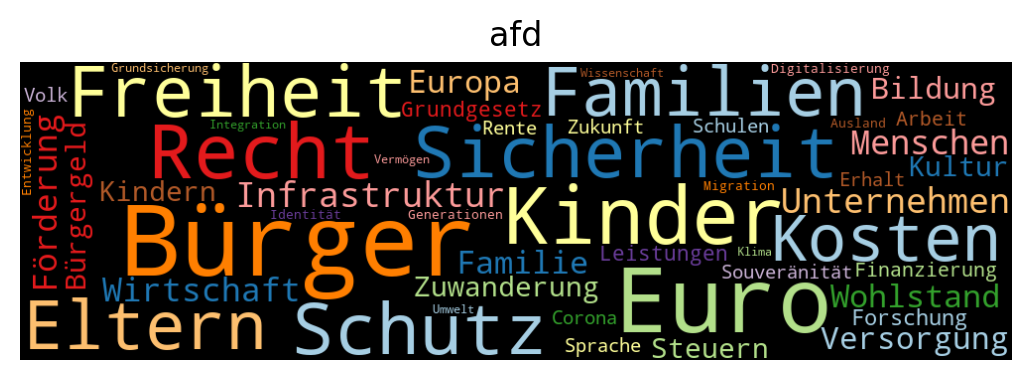

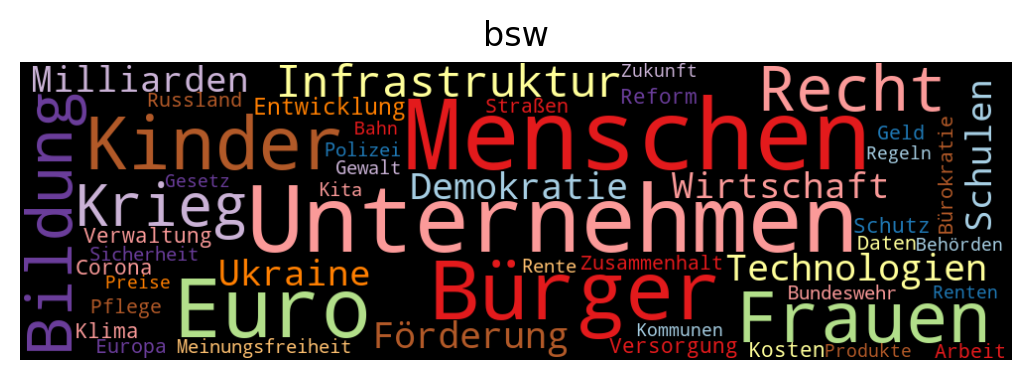

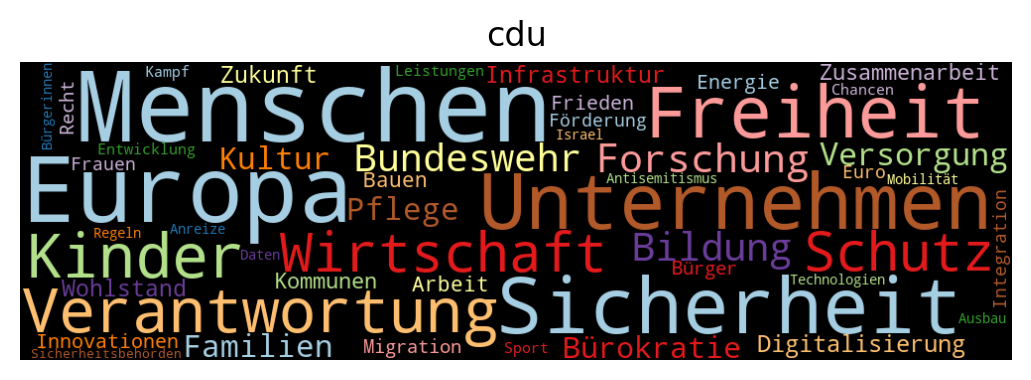

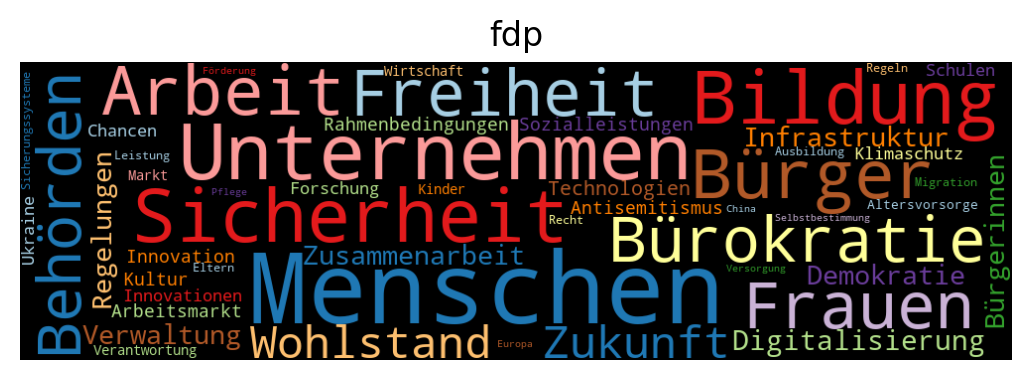

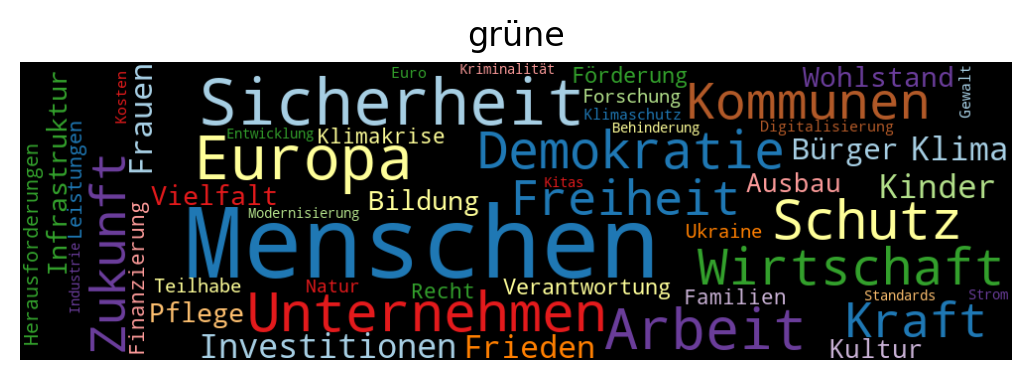

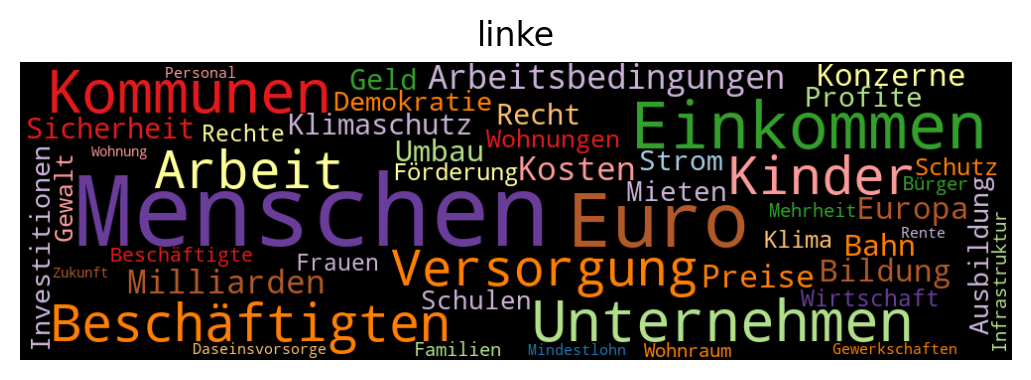

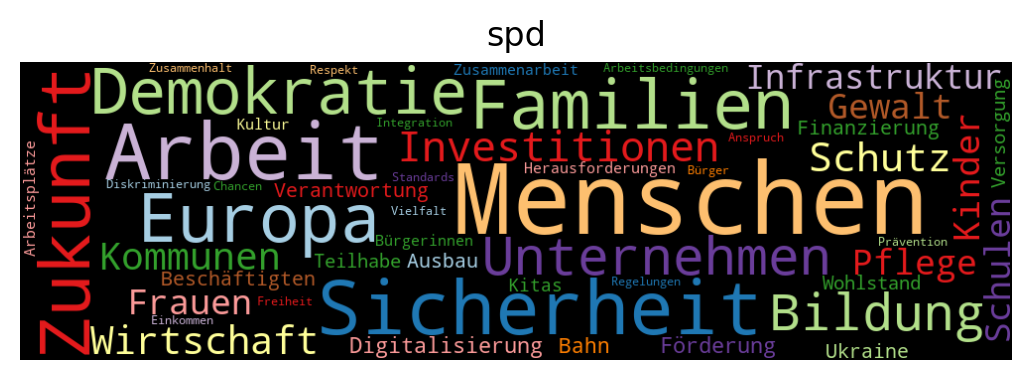

In [39]:
stop_words = set(stopwords.words("german"))
exclude_words = set(["Eichhorster","Bundesgeschäftsstelle","Dabei","Rahmen","B","Bereich","Viele","Deshalb","Partei","Parteien","Dafür","Zeit","Beispiel","Stärkung",
                     "Möglichkeit","Ziel","Berlin","Bedeutung","Unterstützung","Welt","Form","Jahren","Konzept","Glinkastr","Folge","Interesse",
                     "Leben","Prozent","Teil","Jahr","Jahre","Ende","Millionen","Aufgaben","Ebene","Regierung","Zudem","Organisationen","Bundesregierung"
                     ,"Zugang","Bundestag","Statt","Maßnahmen","Mehr","Plan","Politik","Blick","Ver","Worauf","Raum","Ja","Sinne","Außerdem","Daher","Hand",
                     "Zugleich","Deswegen","Enwurf","Regierungsprogramm","Wer","Verfahren","Kapitel","Gleichzeitig","Neben","Art","Abs","Land","Länder","Ländern",
                     "Länder ","Nutzung","Rolle","Ort","Bundes","For","Aufgabe","Lebens","Immer","Milliarden Euro","Ampel","Be","Ge","Landes","Ziele","Darüber",
                     "Bundeshaushalt","Bundestagswahl","Deutschlands","Deutschland","Deutsch","Gesellschaft","Abschaffung","Europäischen","Staat","Staaten","Forderungen",
                     "Voraussetzungen","Interessen","Mittel","Zahl","Strukturen","Partner","Bund","E","Gerade","Men","Bund","Entwurf","Besser","Grundlage","Regionen",
                     "Freie","Demokraten","Personen","Bürgern","Union","Vertrauen","Einsatz","Zeiten","Linke"])
folder_path = r"C:\Users\Besitzer\Desktop\Wahlprogramme"
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
        capitalized_words = re.findall(r'\b[A-ZÄÖÜ][a-zäöüß]*\b', text)
        filtered_words = [word for word in capitalized_words if word.lower() not in stop_words and word not in exclude_words]
        word_frequencies = Counter(filtered_words) 
        wordcloud = WordCloud(stopwords=stop_words, background_color="black", colormap="Paired",
                              width=1000, height=300,
                             max_font_size=100, min_font_size=10,
                            max_words=50
                            ).generate_from_frequencies(word_frequencies)
        plt.figure( dpi=200)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        name, _ = os.path.splitext(filename) 
        plt.title(f'{name}')
        output_path = os.path.join(folder_path, f"{name}.png")
        plt.savefig(output_path, format="png", bbox_inches="tight", pad_inches=0)
        plt.show()
        plt.close()